In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [4]:
loc = "../local_data/he2_log2"
types = 'crx'

In [5]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [6]:
energies_ng.shape

(6, 6, 30, 201)

In [7]:
en_min = np.min(energies_ng[:,:,:,-1], axis=2)
en_min

array([[-5.69624615, -5.70510292, -5.70802355, -5.70867252, -5.70593548,
        -5.70289946],
       [-5.71044207, -5.71107197, -5.71017122, -5.70993567, -5.70752192,
        -5.70473957],
       [-5.71035194, -5.7100029 , -5.70898962, -5.70901108, -5.70743513,
        -5.7019825 ],
       [-5.71002007, -5.71072626, -5.70999241, -5.70810175, -5.70531893,
        -5.69812155],
       [-5.70951366, -5.71012497, -5.70721769, -5.70720291, -5.70327806,
        -5.68879652],
       [-5.67773438, -5.62592411, -5.6663332 , -5.65325308, -5.5939703 ,
        -3.49188423]])

In [15]:
weights_lr_list = np.linspace(0.1, 0.0001, 6)
phi_lr_list = np.linspace(0.1, 0.0001, 6)

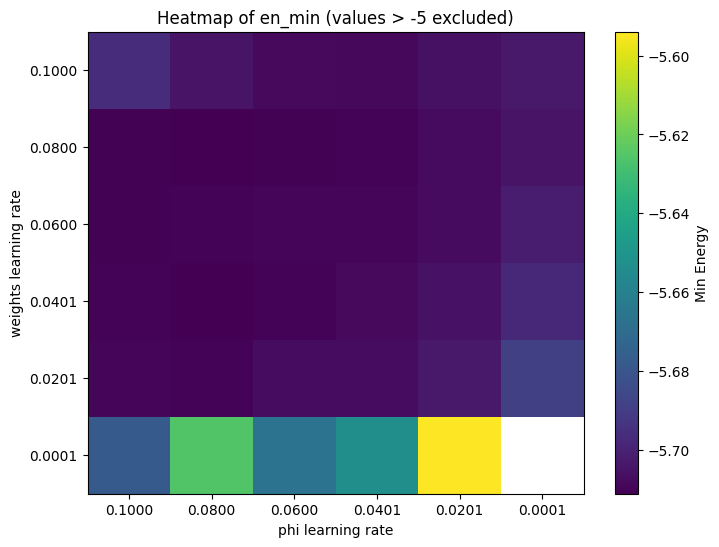

In [16]:
masked_en_min = np.where(en_min > -5, np.nan, en_min)
plt.figure(figsize=(8, 6))
plt.imshow(masked_en_min, aspect='auto', cmap='viridis')
plt.colorbar(label='Min Energy')
plt.xticks(ticks=np.arange(len(phi_lr_list)), labels=[f"{lr:.4f}" for lr in phi_lr_list])
plt.yticks(ticks=np.arange(len(weights_lr_list)), labels=[f"{lr:.4f}" for lr in weights_lr_list])
plt.xlabel('phi learning rate')
plt.ylabel('weights learning rate')
plt.title('Heatmap of en_min (values > -5 excluded)')
plt.show()

In [17]:
mean_loss_ng = np.mean(energies_ng, axis=1)

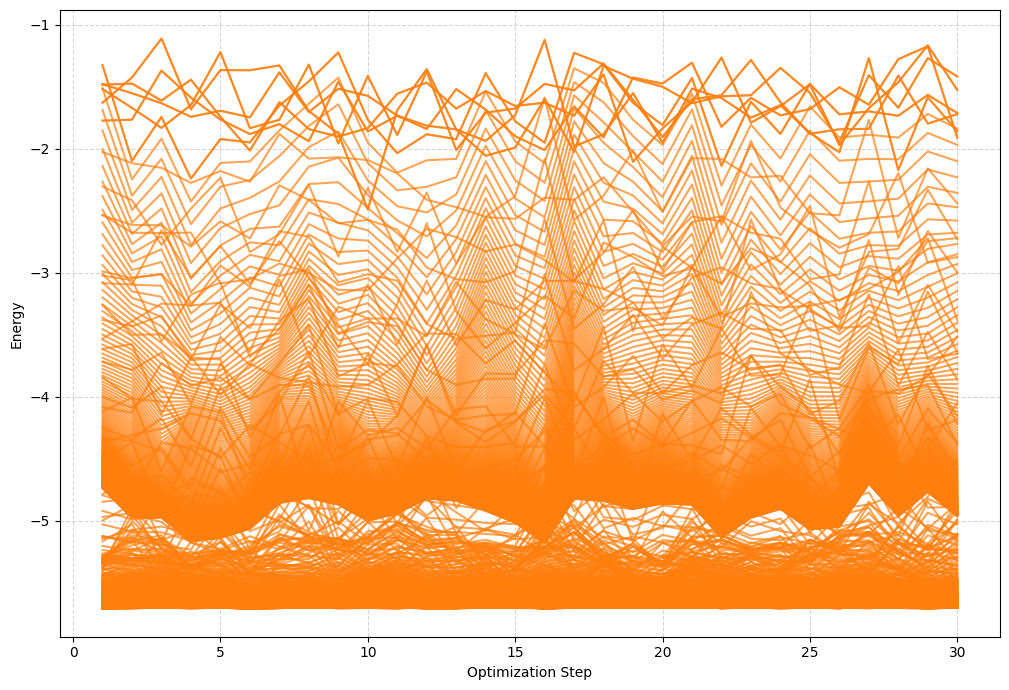

In [18]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_ng.shape[1] + 1)

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [19]:
exact_energy = -5.74032428
thetas = np.arange(0, 40, np.pi)

In [20]:
min_ng = np.min(energies_ng, axis=1)[:,-1]

ValueError: x and y must have same first dimension, but have shapes (13,) and (6, 201)

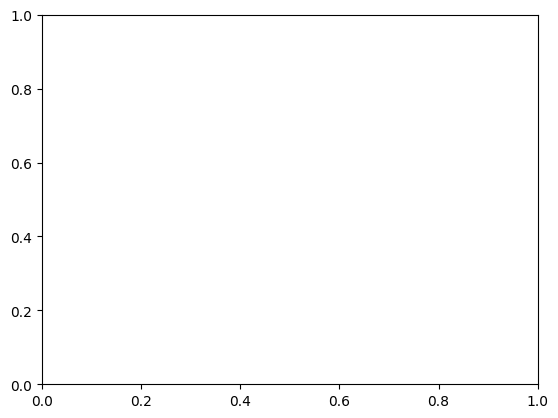

In [21]:
plt.plot(thetas, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [ ]:
median_ng = np.median(energies_ng, axis=1)[:,-1]

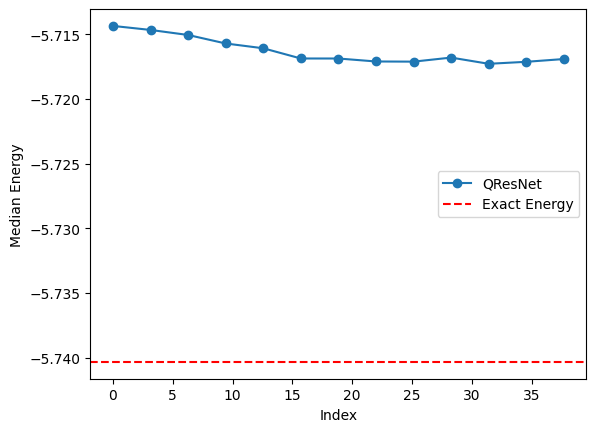

In [ ]:
plt.plot(thetas, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()